In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-19 12:13:58--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.86
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.9MB/s    in 1.4s    

2023-05-19 12:14:00 (19.9 MB/s) - ‘images.zip’ saved [29586716/29586716]



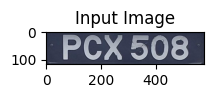

In [ ]:
image = cv2.imread('images/LP.jpg')
imshow('Input Image', image)

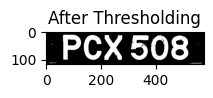

In [ ]:
#otsu calculates the threshold value automatically based on the images' histogram.
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,th2=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("After Thresholding",th2) #contours work best on binary coloured images

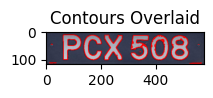

Number of Contours found: 38


In [ ]:
contours,hierarchy = cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
#use -1 parameter to draw all
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours Overlaid',image)
print("Number of Contours found: "+str(len(contours))) 
#1 contours[0] gives the list of all the points that is forming the contour
#background should be mostly black. can invert normal image by cv2.bitwise_not(image) if needed

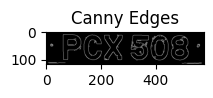

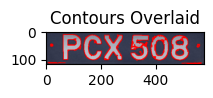

Number of Contours: 77


In [ ]:
#contours using canny images
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cannyimg=cv2.Canny(gray,30,200)
imshow('Canny Edges',cannyimg)

contours,hierarchy = cv2.findContours(cannyimg,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours Overlaid', image)
print("Number of Contours: "+str(len(contours)))
#blurring before thresholding / canny is a good way to remove any noisy contours.

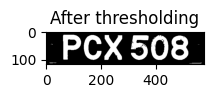

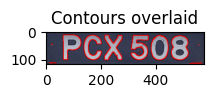

Number of contours: 16
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 -1 -1]]]


In [ ]:
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,th2=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow('After thresholding',th2)
contours,hierarchy=cv2.findContours(th2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours overlaid',image)
print("Number of contours: "+str(len(contours)))
print(hierarchy)

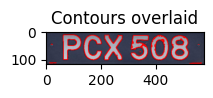

Total Contours: 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [ ]:
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,th2=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarchy = cv2.findContours(th2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours overlaid',image)
print("Total Contours: "+str(len(contours)))
print(hierarchy)

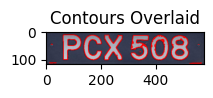

No. of Contours: 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [ ]:
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,th2=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarcy=cv2.findContours(th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours Overlaid',image)
print("No. of Contours: "+str(len(contours)))
print(hierarchy)

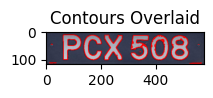

Contours Found: 38
8
10
7
6
40
6
4
4
6
6
6
8
6
1
1
1
15
1
4
2
1
11
57
37
8
27
6
4
8
4
4
114
7
172
121
170
164
65


In [ ]:
#using chain approx simple an help save space. Doesnt store all the coordinates and mostly the endpoints
image=cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,th2=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours,hierarchy=cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
imshow('Contours Overlaid',image)
print('Contours Found: '+str(len(contours)))
for c in contours:
  print(len(c))